# Relationship between income and private health insurance

The goal is to investigate the quantitative effect of income on the procurement of private health insurance using US census data. The target of inference is the logistic regression coefficient when regressing the binary indicator of health insurance on income. The data from California in the year 2019 is downloaded through the Folktables interface (1). Predictions of health insurance are made by training a gradient boosting tree via XGBoost (2) on the previous year’s data.

1. F. Ding, M. Hardt, J. Miller, L. Schmidt, “Retiring adult: New datasets for fair machine learning” in Advances in Neural Information Processing Systems 34 (2021), pp. 6478–6490.
2. T. Chen, C. Guestrin, “XGBoost: A scalable tree boosting system” in Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (2016), pp. 785–794.

### Import necessary packages

In [1]:
import numpy as np
from ppi_py.datasets import load_dataset
from ppi_py import analyze_dataset, plot_cpp

分组： 1
带标签的样本量： 4009
不带标签的样本量： 59634
分组： 2
带标签的样本量： 4009
不带标签的样本量： 59634
分组： 3
带标签的样本量： 4009
不带标签的样本量： 59634
分组： 4
带标签的样本量： 4009
不带标签的样本量： 59634
分组： 5
带标签的样本量： 4009
不带标签的样本量： 59634
带标签的样本量： 20045
不带标签的样本量： 298170


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(



最终结果：
真实 theta: 1.9133574599926604e-05
CPP intervals: [array([1.53600347e-05, 2.24685811e-05]), array([1.77479505e-05, 2.38482191e-05]), array([1.31663015e-05, 1.99526283e-05]), array([1.67168106e-05, 2.37830312e-05]), array([1.45659866e-05, 2.16798369e-05])]
组合数据的置信区间: [1.67165341e-05 1.97179512e-05]
联邦聚合后的置信区间: [1.71671357e-05 2.02733144e-05]
Updated CSV file 'parameters.csv' successfully.


meta NOT subset; don't know how to subset; dropped


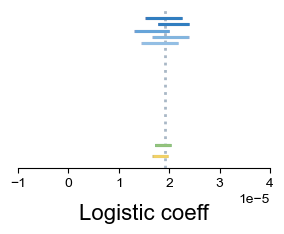

In [2]:
# 示例调用
dataset_name = "census_healthcare"
data = load_dataset('./data/', dataset_name)
Y_total = data["Y"]
Yhat_total = data["Yhat"]
X_total = data["X"]

alpha = 0.05

method = "logistic"

dataset_dist = 'IID'
# dataset_dist = 'Non-IID'

# num_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num_ratio = [1, 1, 1, 1, 1]  # 数据量分布平衡
# num_ratio = [1,2,3,3,1]  # 数据量分布不平衡

# 计算标注真实值、各节点上、组合数据后和FL后的平均值cpp
true_theta, cpp_intervals, ppi_ci_combined, mean_cpp = analyze_dataset(alpha, X_total, Y_total, Yhat_total, dataset_dist,
                                                                            num_ratio, method, grid=None)
# 画图
file_name = dataset_dist + '-' + dataset_name + '.pdf'
xlim = [-1*1e-5, 4*1e-5]
ylim = [0, 1.0]
title = "Logistic coeff"
plot_cpp(true_theta, cpp_intervals, ppi_ci_combined, mean_cpp, file_name, xlim, ylim, title)